In [25]:
%load_ext autoreload
%autoreload 1

%aimport loss_model.switch_model
from loss_model.switch_model import *
%aimport utils.utils
from utils.utils import *
%aimport system.specs
from system.specs import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Import MOSFET Data

In [26]:
MOS_list = get_MOSFETs_from_database("data/FETs.xlsx")

In [27]:
conduction_loss(MOS_list[3], MD_v6_specs)

array([0.0705287, 0.0705287])

## Plotting Functions

In [56]:
# get list of MOS names and simulation results
MOS_name_list = [SW.part_number for SW in MOS_list]
sim_res_list = [run_SW_sim(SW, MD_v6_specs) for SW in MOS_list]

In [57]:
# check simulation result of a MOSFET
sim_res_list[5]

{'conduction_loss_W': array([0.15057366, 0.15057366]),
 'switching_loss_W': array([0.01164, 0.     ]),
 'deadtime_loss_W': array([0.0024, 0.0024]),
 'gate_charge_loss_W': array([0.001896, 0.001896]),
 'total_loss_W': array([0.16650966, 0.15486966]),
 'temp_rise_Ta_C': 30.531034713458407,
 'temp_rise_Tc_C': 1.504055183778793}

In [53]:
# get the value arrays for plotting
# vals_dict stores the value arrays for each of the simulation result
vals_dict = {}
for val in sim_res_list[0].keys():
    vals_dict[val] = [np.sum(sim_res[val]) for sim_res in sim_res_list]


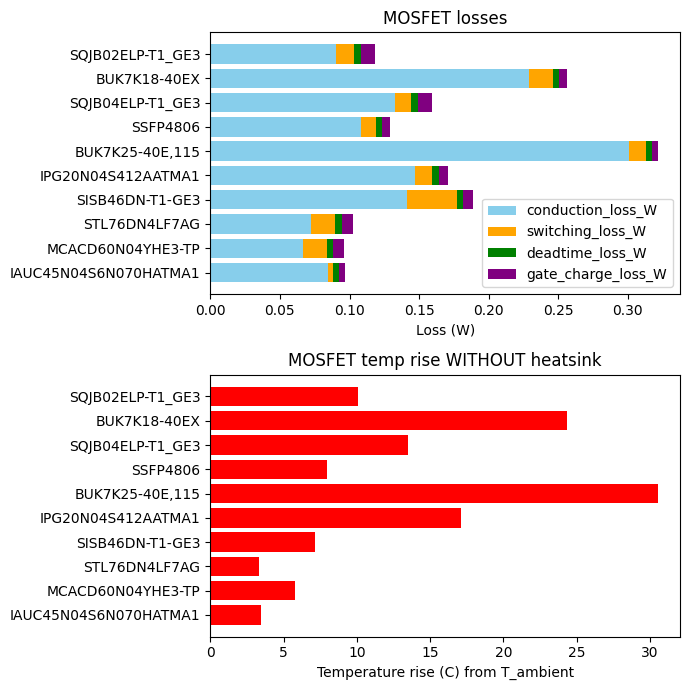

In [72]:
vals_to_plot = list(vals_dict.values())
vals_labels = list(sim_res_list[0].keys())
colors = ['skyblue', 'orange', 'green', 'purple']

# Draw MOSFET loss
# Create figure and axis
fig, ax = plt.subplots(2,1, figsize = (7,7))

# Initialize left position for stacking
left = np.zeros(len(MOS_name_list))

# Iteratively create the stacked horizontal bars
for i in range(4):
    ax[0].barh(MOS_name_list, vals_to_plot[i], left=left, color=colors[i], label=vals_labels[i])
    # Update the left position for the next stack
    left = np.add(left, vals_to_plot[i])

ax[0].set_title("MOSFET losses")
ax[0].set_xlabel("Loss (W)")
ax[0].legend()

# draw temperature rise without heat sink (relying only on convection)
ax[1].barh(MOS_name_list, vals_dict["temp_rise_Ta_C"], color='red')
ax[1].set_xlabel("Temperature rise (C) from T_ambient")
ax[1].set_title("MOSFET temp rise WITHOUT heatsink")
fig.tight_layout()